In [1]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get Working Directory
#cwd = os.getcwd()
cwd = 'C:\Vibhaas\personal\Data Science Study\Projects\Kaggle\Titanic\Attempt 2\Dataset'

# load the dataset
file = cwd+'\\train.csv'
df_titanic_basedata_train_0 = pd.read_csv(file)
df_titanic_basedata_train_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# load the dataset
file = cwd+'\\test.csv'
df_titanic_basedata_test_0 = pd.read_csv(file)
df_titanic_basedata_test_0.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# data size
print("Train Data Size: ", df_titanic_basedata_train_0.shape)
print("Test Data Size:  ", df_titanic_basedata_test_0.shape)

Train Data Size:  (891, 12)
Test Data Size:   (418, 11)


In [36]:
# Show if any NAN data
df_titanic_basedata_train_0.isnull().sum()
#Age            177
#Embarked         2
#Cabin          687

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# Show if any NAN data
df_titanic_basedata_test_0.isnull().sum()
#Age            86
#Fare         1
#Cabin          327

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
df_titanic_basedata_train_1 = df_titanic_basedata_train_0.copy()
df_titanic_basedata_test_1 = df_titanic_basedata_test_0.copy()

1- There is more NAN value in "Cabin", "Age" columns. 
2- we did not need "PassengerId" columns.
So we need to fix that

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(np.nan, "mean")

df_titanic_basedata_train_1['Age'] = imputer.fit_transform(np.array(df_titanic_basedata_train_1['Age']).reshape(891, 1)) # 1st
df_titanic_basedata_train_1.Embarked.fillna(method='ffill', inplace=True) # 2nd
df_titanic_basedata_train_1.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True) # 3rd

df_titanic_basedata_test_1['Age'] = imputer.fit_transform(np.array(df_titanic_basedata_test_1['Age']).reshape(418, 1))
df_titanic_basedata_test_1.Embarked.fillna(method='ffill', inplace=True)
df_titanic_basedata_test_1.Fare.fillna(method='ffill', inplace=True)
df_titanic_basedata_test_1.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [40]:
df_titanic_basedata_test_1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

SimpleImputer is sklearn library for Imputation of missing values You Can find all of them here: https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation

### Data Visualization

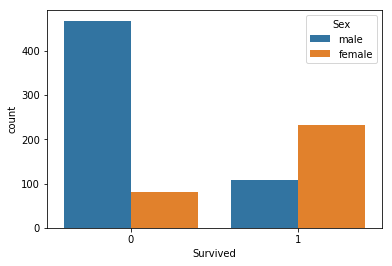

In [14]:
sns.countplot(x='Survived', hue='Sex', data=df_titanic_basedata_train_1)

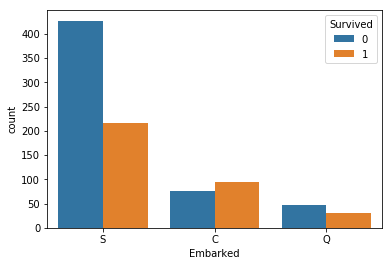

In [15]:
sns.countplot(x='Embarked', hue='Survived', data=df_titanic_basedata_train_1)

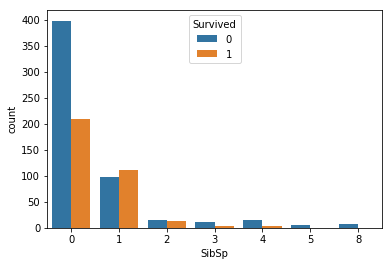

In [16]:
sns.countplot(x='SibSp', hue='Survived', data=df_titanic_basedata_train_1)

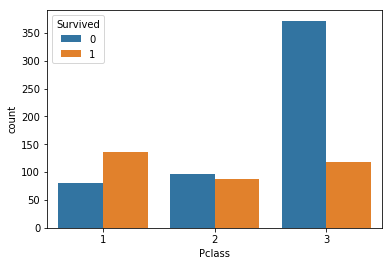

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df_titanic_basedata_train_1)

Text(0.5, 1.0, 'Titanic_Raw_Data')

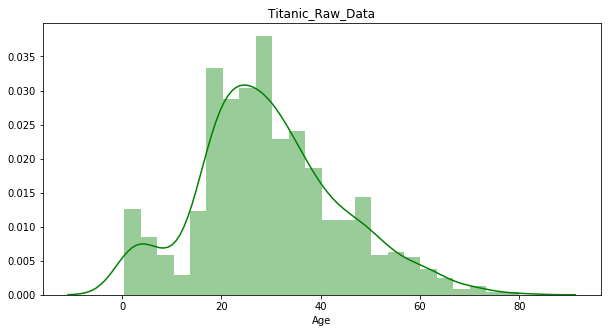

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(df_titanic_basedata_train_1['Age'], bins=24, color='g').set_title('Titanic_Raw_Data')

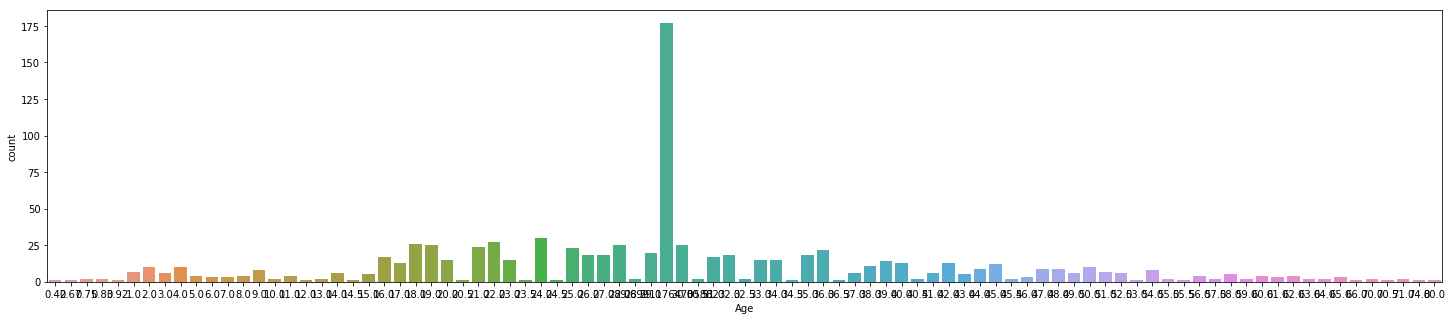

In [28]:
plt.figure(figsize=(25,5))
sns.countplot(x='Age', data=df_titanic_basedata_train_1)

In [29]:
# why is there a spike in age? is this an anamoly that needs to be fixed?

Preprocessing data for machine learning

In [41]:
objects_cols = df_titanic_basedata_train_1.select_dtypes("object").columns
objects_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder

objects_cols = df_titanic_basedata_train_1.select_dtypes("object").columns
objects_cols

le = LabelEncoder()
df_titanic_basedata_train_1[objects_cols] = df_titanic_basedata_train_1[objects_cols].apply(le.fit_transform)
df_titanic_basedata_test_1[objects_cols] = df_titanic_basedata_test_1[objects_cols].apply(le.fit_transform)
df_titanic_basedata_train_1[objects_cols].head()

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0
2,0,669,2
3,0,49,2
4,1,472,2


In [43]:
df_titanic_basedata_train_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df_titanic_basedata_train_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


(10, 0)

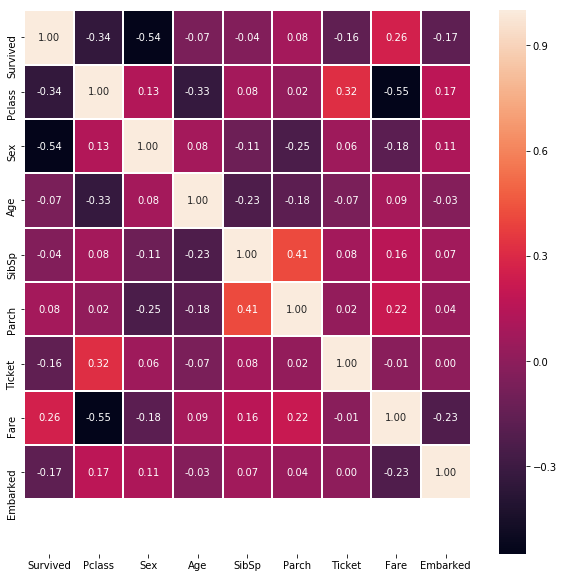

In [45]:

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_titanic_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
ax.set_ylim(10, 0)

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [51]:
# Machine Learning 

X = df_titanic_basedata_train_1.drop("Survived", axis=1)
y = df_titanic_basedata_train_1["Survived"]

In [52]:
type(X)

pandas.core.frame.DataFrame

In [17]:
scale = StandardScaler()
scale.fit(X)

from sklearn.preprocessing import StandardScaler
X = scale.transform(X)

In [30]:
X = pd.DataFrame(X)

In [33]:
type(y)

numpy.ndarray

In [54]:
y = pd.DataFrame(y)

In [55]:
type(y)

pandas.core.frame.DataFrame

Machine Learing

In [18]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

Start modeling.

Class Model Idea from "Heart Disease - Classifications" kernel here: https://www.kaggle.com/elcaiseri/heart-disease-classifications

In [19]:
class Model:
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
    
    def train(self):
        print(f"Training {self.model_name()} Model...")
        self.model.fit(X_train, y_train)
        print("Model Trained.")
        
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(f"{self.model_name()} Model Accuracy: ", acc)


In [20]:
xgb = XGBClassifier()
xgb = Model(xgb)

Training XGBClassifier Model...
Model Trained.


In [21]:
xgb.cross_validation()

Evaluate XGBClassifier score by cross-validation...
[0.80446927 0.82681564 0.84269663 0.81460674 0.86440678]
Mean accuracy of cross-validation:  0.8305990133297302


In [22]:
xgb.accuracy()

XGBClassifier Model Accuracy:  0.8383838383838383


In [60]:
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
#model = LogisticRegression()
xgb_model = xgb.XGBClassifier()

for train_index, test_index in kf.split(df_titanic_basedata_train_1):
       # print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #model.fit(X_train,y_train)

        xgb_model.fit(X_train, y_train)
        #print('Accuracy of XGB classifier on training set: {:.2f}'        .format(xgb_model.score(X_train, y_train)))
        #print('Accuracy of XGB classifier on test set: {:.2f}'        .format(xgb_model.score(X_test[X_train.columns], y_test)))
        
y_pred = xgb_model.predict(df_titanic_basedata_test_1)



C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConve

In [61]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
# load the dataset
file = cwd+'\\test.csv'
DF_Test_Orig = pd.read_csv(file)



GBoutput = pd.DataFrame({"PassengerId": DF_Test_Orig.PassengerId, "Survived":y_pred})
GBoutput.PassengerId = GBoutput.PassengerId.astype(int)
GBoutput.Survived = GBoutput.Survived.astype(int)

GBoutput.to_csv("Strata_xgb_output_withHyperParameter.csv", index=False)
print("Your GB submission was successfully saved!")
GBoutput.head(10)


Your GB submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


[0.15920329 0.497669   0.04835278 0.08268228 0.05112218 0.03963856
 0.04809202 0.07323983]


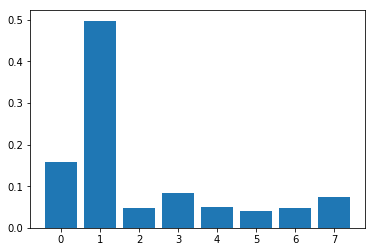

In [95]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [104]:
print(df_titanic_basedata_train_1.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


In [44]:
gnb = GaussianNB()
gnb = Model(gnb)
gnb.cross_validation()
gnb.accuracy()


Training GaussianNB Model...
Model Trained.
Evaluate GaussianNB score by cross-validation...
[0.74301676 0.73184358 0.78089888 0.80337079 0.80225989]
Mean accuracy of cross-validation:  0.7722779770245057
GaussianNB Model Accuracy:  0.7777777777777778


In [45]:
svc = SVC()
svc = Model(svc)
svc.cross_validation()
svc.accuracy()


Training SVC Model...
Model Trained.
Evaluate SVC score by cross-validation...
[0.82681564 0.80446927 0.80337079 0.81460674 0.85310734]
Mean accuracy of cross-validation:  0.8204739577847546
SVC Model Accuracy:  0.8080808080808081


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = Model(rfc)
rfc.cross_validation()
rfc.accuracy()

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...
[0.81005587 0.81005587 0.87640449 0.81460674 0.83615819]
Mean accuracy of cross-validation:  0.8294562319778054
RandomForestClassifier Model Accuracy:  0.8080808080808081


C:\Users\kvibhaas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Submitting

In [47]:
df_titanic_basedata_test_1.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2


In [48]:
# Predict our file test
test_X = df_titanic_basedata_test_1.values
test_X = scale.transform(test_X)

In [49]:
xgb_pred = xgb.prediction(test_x=test_X, test=True)
gnb_pred = gnb.prediction(test_x=test_X, test=True)
svc_pred = svc.prediction(test_x=test_X, test=True)
rfc_pred = rfc.prediction(test_x=test_X, test=True)

In [51]:
# load the dataset
file = cwd+'\\gender_submission.csv'
sub = pd.read_csv(file)
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
sub['Survived'] = xgb_pred # Best Submission (Top 5% LB)
sub.to_csv('xgb_submission.csv', index=False)
sub.head(10)
#Your submission scored 0.77511

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [59]:
    # 3. Confusion matrix for Gradient Boosting
from sklearn.metrics import confusion_matrix
xgb1 = XGBClassifier()
#Import Gradient Boosting Classifier model
#from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
#gb = GradientBoostingClassifier()

#X_train, X_test, y_train, y_test 

#Train the model using the training sets
xgb1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = xgb1.predict(X_test)


cm3=confusion_matrix(y_test,xgb1.predict(X_test))
col1=["Predicted Dead","Predicted Survived"]
cm3=pd.DataFrame(cm3)
cm3.columns=["Predicted Dead","Predicted Survived"]
cm3.index=["Actual Dead","Actual Survived"]
print("Confusion Matrix: XGradient Boosting")
print(cm3)

Confusion Matrix: XGradient Boosting
                 Predicted Dead  Predicted Survived
Actual Dead                 165                  21
Actual Survived              27                  84


In [58]:
#Confusion Matrix: Gradient Boosting
#                 Predicted Dead  Predicted Survived
#Actual Dead                 101                   9
#Actual Survived              22                  47

### Attempt 7

In [60]:
df_titanic_basedata_train_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [74]:
(pd.DataFrame(X)).head(10)

,0,1,2,3,4,5,6,7
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,0.918966,-0.502445,0.589045
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,1.282625,0.786845,-1.934220
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,0.589045
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.589045
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,0.664904,-0.486337,0.589045
5,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.316475,-0.478116,-0.672587
6,-1.566107,0.737695,1.870059,-0.474545,-0.473674,-1.262983,0.395814,0.589045
7,0.827377,0.737695,-2.131568,2.247470,0.767630,0.281319,-0.224083,0.589045
8,0.827377,-1.355574,-0.207709,-0.474545,2.008933,0.027256,-0.424256,0.589045
9,-0.369365,-1.355574,-1.208115,0.432793,-0.473674,-1.028847,-0.042956,-1.934220


In [65]:
x_transformed = pd.DataFrame(X)

In [83]:
# Machine Learning 
X_dist = df_titanic_basedata_train_1.drop(['Survived'], 1).values
#y = df_titanic_basedata_train_1['Survived'].values

In [84]:
from sklearn.preprocessing import StandardScaler
X_dist_transform = scale.transform(X_dist)

from sklearn import preprocessing

# separate the data and target attributes
X_dist_standard = preprocessing.scale(X_dist)

# normalize the data attributes
X_dist_normalized = preprocessing.normalize(X_dist)


In [1]:
sns.distplot(df_titanic_basedata_train_1['Age'], bins = 10, hist = True).set_title('Raw')

NameError: name 'sns' is not defined

Text(0.5, 1.0, 'transformed')

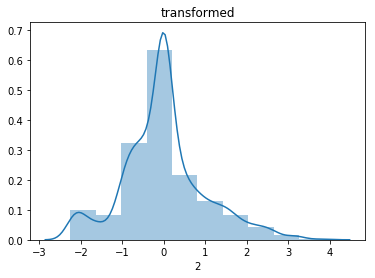

In [92]:

sns.distplot(pd.DataFrame(X_dist_transform).iloc[:,2], bins = 10, hist = True).set_title('transformed')

Text(0.5, 1.0, 'standard')

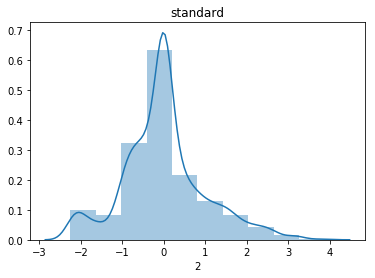

In [91]:

sns.distplot(pd.DataFrame(X_dist_standard).iloc[:,2], bins = 10, hist = True).set_title('standard')

Text(0.5, 1.0, 'normalized')

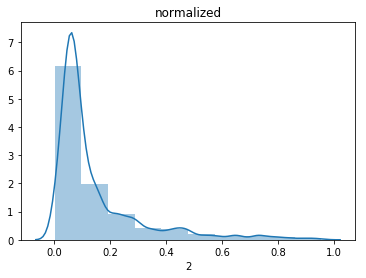

In [89]:

sns.distplot(pd.DataFrame(X_dist_normalized).iloc[:,2], bins = 10, hist = True).set_title('normalized')